# ***CENG463 - HOMEWORK 1***
## ***Meta-Analysis Classification Task***


### ***Introduction***

*In this assignment, the first step is to identify three different topics through Pubmed and create a dataset based on articles. Subsequently, we are required to run this dataset through four different classification algorithms using various parameters. After obtaining the accuracy scores, the task involves preparing a report based on the results. Firstly, we retrieved the titles and abstracts of 500 articles for each topic (kidney disease, type 2 diabetes, brain injury) from Google Scholar. Subsequently, we used these features to create a dataset. Finally, we aimed to achieve the highest test-train accuracy scores by running this dataset through four different classification methods (LogisticRegression, SVC, MultinomialNB, KNeighborsClassifier) with various parameters such as C, alpha, k, gamma. We demonstrated this process using functions.*

### ***Creating the Dataset***

*In the code below, we retrieved titles and abstracts of 500 articles for each topic (kidney disease, type 2 diabetes, brain injury) from Google Scholar. When we run the code, a file named "dataset.csv" will be created, representing the dataset we will use for the classifications. Depending on internet and computer speed, this process may take approximately 15-45 minutes. If you do not want to download this file, we will provide the appearance of the functions below since we have created the dataset.*

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

def fetch_abstracts(search_term, max_results=500):
    abstracts = []
    page_num = 1
    while len(abstracts) < max_results:
        search_url = f"https://pubmed.ncbi.nlm.nih.gov/?term={search_term}&page={page_num}&size=10"
        response = requests.get(search_url)

        if response.status_code != 200:
            print(f"Failed to retrieve data for {search_term}")
            break

        page = BeautifulSoup(response.text, 'html.parser')
        articles = page.find_all('div', class_='docsum-content')

        for article in articles:
            if len(abstracts) >= max_results:
                break

            title_section = article.find('a', class_='docsum-title')
            title = title_section.text.strip()

            try:
                pmid = title_section['href'].split('/')[1]
                abstract_page = requests.get(f"https://pubmed.ncbi.nlm.nih.gov/{pmid}/")
                if abstract_page.status_code != 200:
                    continue  # Skip this article if abstract page cannot be retrieved

                abstract_soup = BeautifulSoup(abstract_page.text, 'html.parser')
                abstract_text = abstract_soup.find('div', class_='abstract-content').text.strip()
                abstracts.append({"title": title, "abstract": abstract_text})
            except Exception as e:
                continue  # Skip this article if any error occurs while fetching abstract

        page_num += 1

    return abstracts

def save_to_csv(abstracts, search_term, filename="dataset.csv"):
    with open(filename, mode='a', newline='', encoding='utf-8') as file:  # mode changed to 'a' for appending
        writer = csv.writer(file)
        if file.tell() == 0:
            writer.writerow(["Search Term", "Title", "Abstract"])
        for abstract in abstracts:
            writer.writerow([search_term, abstract['title'], abstract['abstract']])

search_terms = ["kidney disease", "type 2 diabetes", "brain injury"]
for term in search_terms:
    abstracts = fetch_abstracts(term)
    save_to_csv(abstracts, term)

### ***Creating of the Test and Training Sets***

*The purpose of the provided code is to perform text classification on a dataset. The code uses the scikit-learn library and other relevant modules to preprocess textual data and apply the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique to convert the text into numerical features. The dataset is loaded from a CSV file ('dataset.csv'), and the 'Abstract' column in the dataset is preprocessed by removing special characters, single characters, and stopwords. The 'Abstract' column is then combined with the 'Title' column to create a new feature called 'Combined_Features'. The labels for classification are taken from the 'Search Term' column. Finally, the TF-IDF vectorization is applied with specific parameters, and the dataset is split into training and testing sets for further use in machine learning models, such as logistic regression, support vector machines, naive Bayes, and k-nearest neighbors.*

In [2]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/MyDrive/python/CENG463_homeworks

# Load the dataset
data = pd.read_csv('dataset.csv')

# Preprocess text data
def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    return text.lower()

#data['Title'] = data['Title'].apply(preprocess_text)
data['Abstract'] = data['Abstract'].apply(preprocess_text)

# Combine Title and Abstract into one feature
data['Combined_Features'] = data['Abstract']

# Labels
labels = data['Search Term']

# TF-IDF Vectorization
nltk.download('stopwords')
vectorizer = TfidfVectorizer(max_features=2000, min_df=7, max_df=0.8, stop_words=nltk.corpus.stopwords.words('english'))
processed_features = vectorizer.fit_transform(data['Combined_Features']).toarray()

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

Mounted at /content/drive
/content/drive/MyDrive/python/CENG463_homeworks


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### ***LogisticRegression Results Using the Different "C" values***

*Interpreting the results based on the given accuracies for different values of the regularization parameter (C) in Logistic Regression:*

*For C=0.001: A low C value leads to stronger regularization. In this case, the training accuracy is 0.87, and the test accuracy is 0.86. The model is closer to generalizing rather than fitting the training data.*

*For C=0.01: As C increases, both training and test accuracies improve (0.999 and 0.997). The model fits the training data more closely, enhancing its generalization ability. However, there is an increased risk of overfitting.*

*For C=0.1, C=1, C=10, C=100: At these points, both training and test accuracies are 1.0. This indicates a perfect fit to the training data, but it also raises concerns about overfitting. Higher C values imply less regularization, allowing the model to fit the training set more closely.*

*In conclusion, choosing the appropriate value for the regularization parameter (C) in Logistic Regression involves balancing between overfitting and generalization. It is crucial to select a C value that enables the model to fit the specific situation optimally.*

C=0.001
Train Accuracy: 0.8658333333333333
Test Accuracy: 0.8566666666666667
----------------------------------------
C=0.01
Train Accuracy: 0.9991666666666666
Test Accuracy: 0.9966666666666667
----------------------------------------
C=0.1
Train Accuracy: 1.0
Test Accuracy: 1.0
----------------------------------------
C=1
Train Accuracy: 1.0
Test Accuracy: 1.0
----------------------------------------
C=10
Train Accuracy: 1.0
Test Accuracy: 1.0
----------------------------------------
C=100
Train Accuracy: 1.0
Test Accuracy: 1.0
----------------------------------------


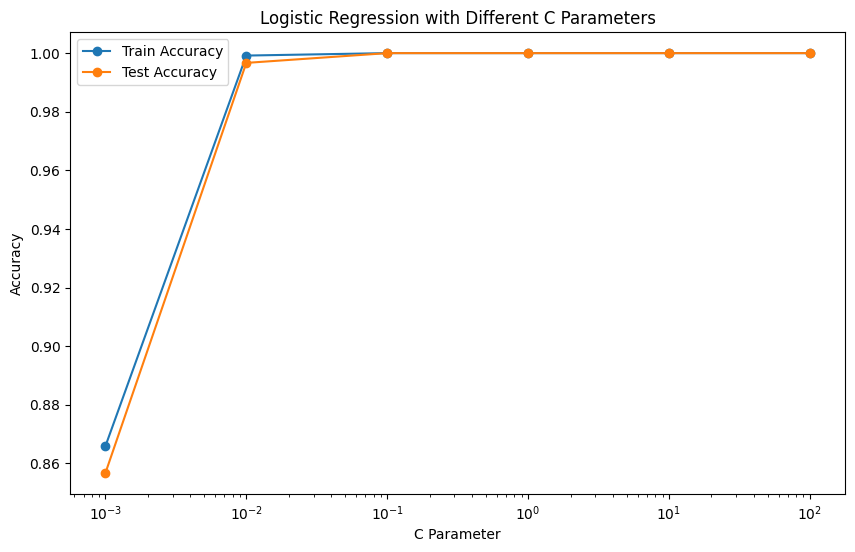

In [7]:
# Range of C values to try
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different C values
for c in c_values:
    lr_classifier = LogisticRegression(C=c)
    lr_classifier.fit(X_train, y_train)

    # Predictions on the training set
    train_predictions = lr_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions on the test set
    test_predictions = lr_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_accuracies.append(test_accuracy)

    print(f"C={c}")
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("----------------------------------------")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(c_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(c_values, test_accuracies, marker='o', label='Test Accuracy')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.title('Logistic Regression with Different C Parameters')
plt.legend()
plt.show()

### ***SVC Results Using the Different "C" and "Gamma" values***

*Interpreting the results based on the given accuracies for different values of the regularization parameter (C) and the kernel coefficient (Gamma) in the Support Vector Classifier (SVC):*

*For C=0.001: Low training and test accuracies are observed for all Gamma values (approximately 0.67). The model exhibits weak performance and lacks good generalization ability.*

*For C=0.01: Similarly, low training and test accuracies are observed for all Gamma values (around 0.67). The model's generalization ability does not improve.*

*For C=0.1: In this case, training and test accuracies significantly increase for Gamma=0.1 and Gamma=1 (from 0.88 to 1.0). The model adapts better to complex patterns and shows high generalization ability.*

*For C=1, C=10, C=100: For most Gamma values, training and test accuracies are 1.0. The model fits the training data perfectly, but with high C and low Gamma values, it tends to overfit.*

*In cases where Gamma increases (e.g., Gamma=10 and Gamma=100), test accuracy decreases. This indicates a tendency for the model to overfit and a decrease in generalization ability.*

*In conclusion, the performance of the SVC model is dependent on carefully selecting the C and Gamma parameters. Low C and low Gamma provide better generalization, while high C and high Gamma may lead to overfitting. Optimal parameter combinations should be chosen to achieve the model's best performance.*

C=0.001, Gamma=0.001
Train Accuracy: 0.6716666666666666
Test Accuracy: 0.6433333333333333
----------------------------------------
C=0.001, Gamma=0.01
Train Accuracy: 0.6716666666666666
Test Accuracy: 0.6433333333333333
----------------------------------------
C=0.001, Gamma=0.1
Train Accuracy: 0.6716666666666666
Test Accuracy: 0.6433333333333333
----------------------------------------
C=0.001, Gamma=1
Train Accuracy: 0.6716666666666666
Test Accuracy: 0.6433333333333333
----------------------------------------
C=0.001, Gamma=10
Train Accuracy: 0.6716666666666666
Test Accuracy: 0.3233333333333333
----------------------------------------
C=0.001, Gamma=100
Train Accuracy: 0.6716666666666666
Test Accuracy: 0.3233333333333333
----------------------------------------
C=0.01, Gamma=0.001
Train Accuracy: 0.6716666666666666
Test Accuracy: 0.6433333333333333
----------------------------------------
C=0.01, Gamma=0.01
Train Accuracy: 0.6716666666666666
Test Accuracy: 0.6433333333333333
--------

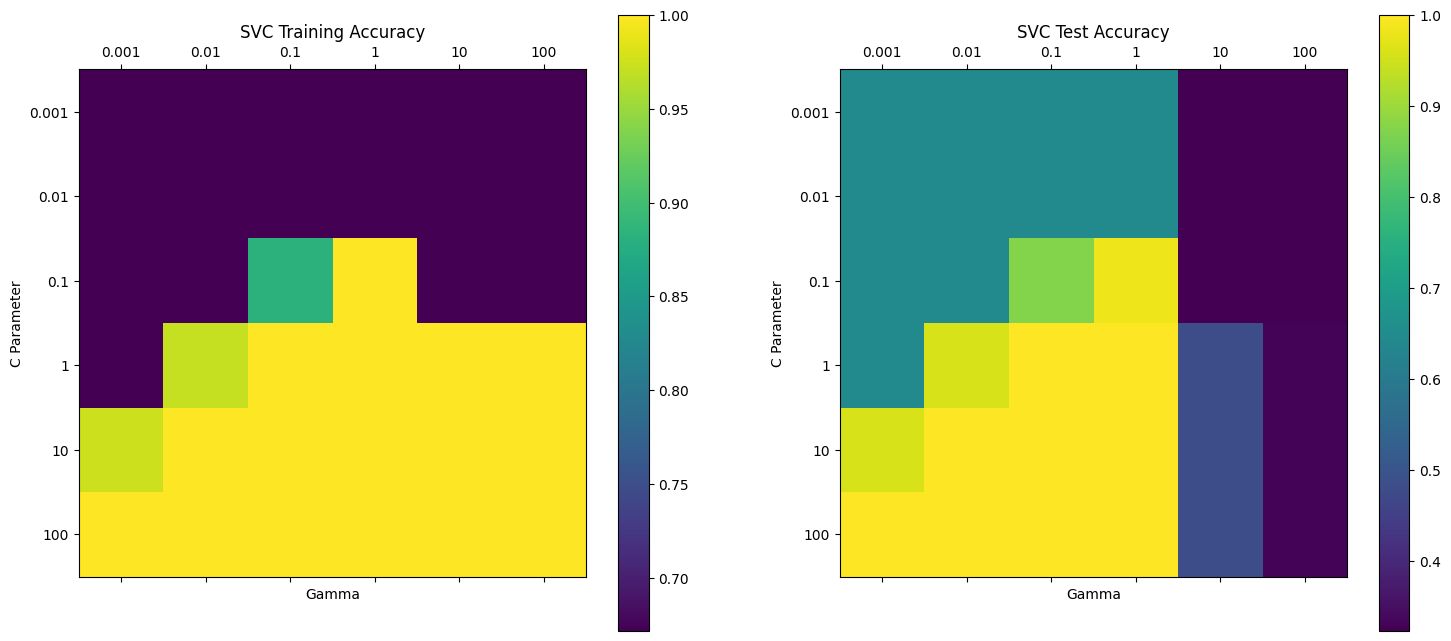

In [8]:
# Range of C values and gamma values to try
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different C and gamma values
for c in c_values:
    for gamma in gamma_values:
        svc_classifier = SVC(C=c, gamma=gamma)
        svc_classifier.fit(X_train, y_train)

        # Predictions on the training set
        train_predictions = svc_classifier.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_predictions)

        # Predictions on the test set
        test_predictions = svc_classifier.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_predictions)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"C={c}, Gamma={gamma}")
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
        print("----------------------------------------")

# Reshape the lists for plotting
train_accuracies = np.array(train_accuracies).reshape(len(c_values), len(gamma_values))
test_accuracies = np.array(test_accuracies).reshape(len(c_values), len(gamma_values))

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

cax1 = ax1.matshow(train_accuracies, cmap='viridis')
fig.colorbar(cax1, ax=ax1)
ax1.set_xticks(np.arange(len(gamma_values)))
ax1.set_yticks(np.arange(len(c_values)))
ax1.set_xticklabels(gamma_values)
ax1.set_yticklabels(c_values)
ax1.set_xlabel('Gamma')
ax1.set_ylabel('C Parameter')
ax1.set_title('SVC Training Accuracy')

cax2 = ax2.matshow(test_accuracies, cmap='viridis')
fig.colorbar(cax2, ax=ax2)
ax2.set_xticks(np.arange(len(gamma_values)))
ax2.set_yticks(np.arange(len(c_values)))
ax2.set_xticklabels(gamma_values)
ax2.set_yticklabels(c_values)
ax2.set_xlabel('Gamma')
ax2.set_ylabel('C Parameter')
ax2.set_title('SVC Test Accuracy')

plt.show()

### ***MultinomialNB Results Using the Different "Alpha" values***

*The provided results for different values of the alpha parameter in Multinomial Naive Bayes (MultinomialNB) reveal the impact of varying smoothing parameters on the model's performance:*

*For Alpha=0.001: A very low smoothing parameter results in perfect training accuracy (1.0) but a slightly lower test accuracy of approximately 0.97. This may indicate a potential risk of overfitting to the training data.*

*For Alpha=0.01 and Alpha=0.1: As the alpha parameter increases, both training and test accuracies remain high, suggesting a good balance between fitting the training data and generalizing to new data.*

*For Alpha=1: The model continues to perform well with high training accuracy (approximately 0.998) and even higher test accuracy (approximately 0.99). This demonstrates a robust generalization ability.*

*For Alpha=10 and Alpha=100: With larger smoothing parameters, both training and test accuracies reach perfect scores (1.0). This might indicate that a significant level of smoothing helps prevent overfitting, resulting in a highly generalized model.*

*In summary, Multinomial Naive Bayes performs well across a range of smoothing parameters. A moderate smoothing parameter (around Alpha=1) appears to strike a good balance between fitting the training data and achieving high generalization on the test data. The model demonstrates robustness with larger smoothing parameters, emphasizing its ability to handle different levels of data variability.*

Alpha=0.001
Train Accuracy: 1.0
Test Accuracy: 0.9666666666666667
----------------------------------------
Alpha=0.01
Train Accuracy: 0.9991666666666666
Test Accuracy: 0.9733333333333334
----------------------------------------
Alpha=0.1
Train Accuracy: 0.9975
Test Accuracy: 0.9766666666666667
----------------------------------------
Alpha=1
Train Accuracy: 0.9975
Test Accuracy: 0.9866666666666667
----------------------------------------
Alpha=10
Train Accuracy: 1.0
Test Accuracy: 1.0
----------------------------------------
Alpha=100
Train Accuracy: 1.0
Test Accuracy: 1.0
----------------------------------------


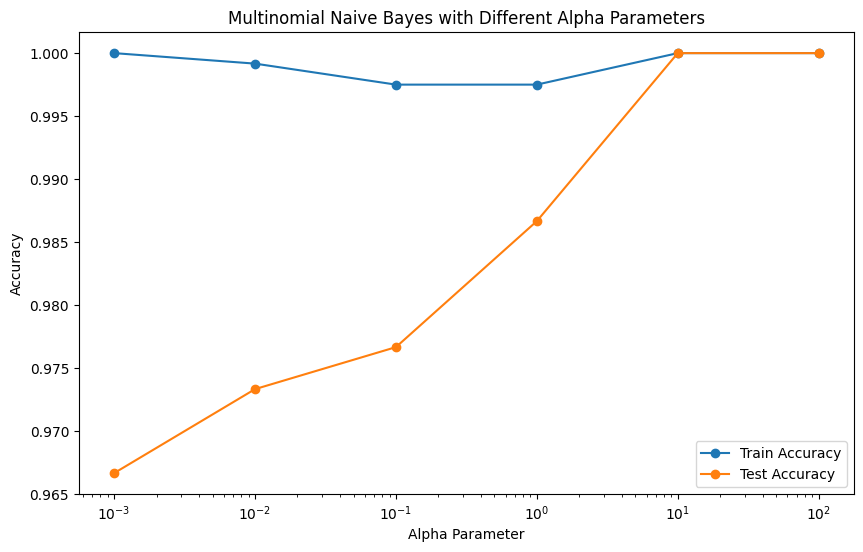

In [9]:
# Range of alpha values to try
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different alpha values
for alpha in alpha_values:
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(X_train, y_train)

    # Predictions on the training set
    train_predictions = nb_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)

    # Predictions on the test set
    test_predictions = nb_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Alpha={alpha}")
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("----------------------------------------")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(alpha_values, test_accuracies, marker='o', label='Test Accuracy')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.xlabel('Alpha Parameter')
plt.ylabel('Accuracy')
plt.title('Multinomial Naive Bayes with Different Alpha Parameters')
plt.legend()
plt.show()

### ***KNeighborsClassifier Results Using the Different "K" (n_neighbors) values***

*The provided results for different values of the parameter K in the k-Nearest Neighbors (k-NN) algorithm offer insights into its impact on the model's performance:*

*For K=1: With a small value of K, the model achieves perfect training accuracy (1.0), indicating it memorizes the training data well. However, the test accuracy is slightly lower (approximately 0.93), suggesting a potential for overfitting or sensitivity to noise in the data.*

*For K=3, K=5, K=7: As K increases, both training and test accuracies remain high, with a peak at K=7. This suggests that a moderate number of neighbors contributes to a well-generalized model, striking a balance between overfitting and underfitting.*

*For K=9, K=11: Further increasing K results in a slight decrease in both training and test accuracies, indicating a diminishing return in performance. The model may start to lose its ability to capture intricate patterns in the data.*

*In summary, the k-Nearest Neighbors model performs well with moderate values of K (around 7), demonstrating a good balance between capturing patterns in the data and generalizing to new, unseen data. The choice of K is crucial, and it should be tuned based on the specific characteristics of the dataset to achieve optimal performance.*

K=1
Train Accuracy: 1.0
Test Accuracy: 0.9333333333333333
----------------------------------------
K=3
Train Accuracy: 0.9791666666666666
Test Accuracy: 0.9666666666666667
----------------------------------------
K=5
Train Accuracy: 0.9816666666666667
Test Accuracy: 0.9733333333333334
----------------------------------------
K=7
Train Accuracy: 0.9825
Test Accuracy: 0.9833333333333333
----------------------------------------
K=9
Train Accuracy: 0.9858333333333333
Test Accuracy: 0.9766666666666667
----------------------------------------
K=11
Train Accuracy: 0.9883333333333333
Test Accuracy: 0.9833333333333333
----------------------------------------


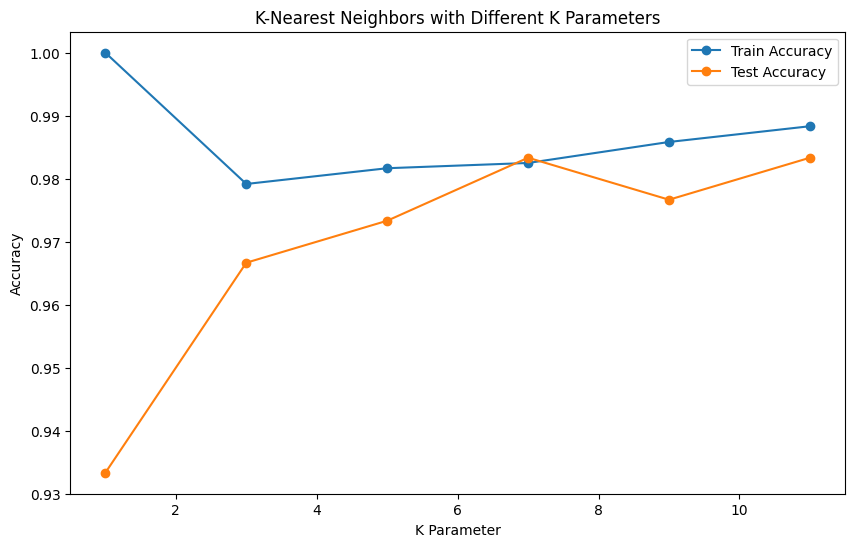

In [10]:
# Range of k values to try
k_values = [1, 3, 5, 7, 9, 11]

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different k values
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    # Predictions on the training set
    train_predictions = knn_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)

    # Predictions on the test set
    test_predictions = knn_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"K={k}")
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("----------------------------------------")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('K Parameter')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors with Different K Parameters')
plt.legend()
plt.show()

### ***CONCLUSION***

*In summary, the overarching theme across various machine learning models is the critical role of parameter tuning in achieving optimal performance. Whether it's selecting the appropriate regularization parameter (C) in Logistic Regression to balance between overfitting and generalization, carefully choosing C and Gamma parameters in Support Vector Classifier (SVC) to manage generalization and overfitting trade-offs, identifying a moderate smoothing parameter (around Alpha=1) for Multinomial Naive Bayes, or tuning the number of neighbors (K) in k-Nearest Neighbors for effective pattern capture and generalization, the success of these models hinges on the meticulous adjustment of key parameters based on the specific characteristics of the dataset.*